In [13]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 667.8 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 512.0 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 547.6 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 568.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 583.1 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 718.0 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 759.1 kB/s eta 0:00:00


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv("train.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_train.shape

(891, 12)

In [8]:
data_train.size

10692

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data visalization

<Axes: xlabel='Sex', ylabel='Survived'>

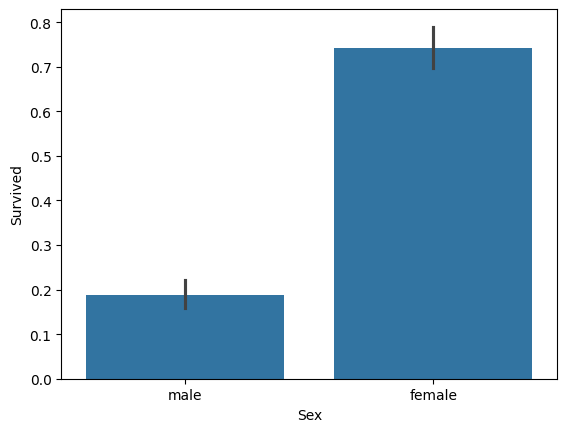

In [15]:
sns.barplot(x="Sex", y='Survived', data = data_train)


In [18]:
print('Percentage of women who survived', data_train['Survived'][data_train['Sex'] == 'female'].value_counts(normalize= True)[1]*100)

Percentage of women who survived 74.20382165605095


In [24]:
print('Percentage of men who survived', data_train['Survived'][data_train['Sex'] == 'male'].value_counts(normalize= True)[1]*100)

Percentage of men who survived 18.890814558058924


Percentage of Pclass 1 who survived 62.96296296296296
Percentage of Pclass 2 who survived 47.28260869565217
Percentage of Pclass 3 who survived 24.236252545824847


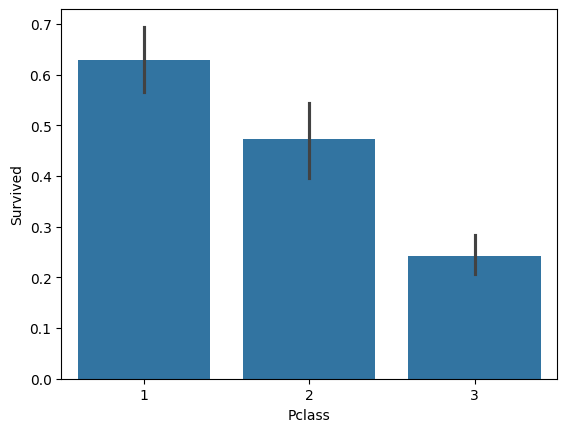

In [27]:
sns.barplot(x='Pclass', y='Survived', data = data_train)

print('Percentage of Pclass 1 who survived', data_train['Survived'][data_train['Pclass'] == 1].value_counts(normalize= True)[1]*100)
print('Percentage of Pclass 2 who survived', data_train['Survived'][data_train['Pclass'] == 2].value_counts(normalize= True)[1]*100)
print('Percentage of Pclass 3 who survived', data_train['Survived'][data_train['Pclass'] == 3].value_counts(normalize= True)[1]*100)